[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...




--------------------------------------------------

PROBLEM 1


Top 10 words in SPAM are: 
1.	subject             [Count : 1632]
2.	http                [Count : 796]
3.	company             [Count : 794]
4.	com                 [Count : 655]
5.	u                   [Count : 655]
6.	price               [Count : 613]
7.	e                   [Count : 588]
8.	www                 [Count : 536]
9.	font                [Count : 444]
10.	statement           [Count : 421]


Top 10 words in HAM are: 
1.	ect                 [Count : 11647]
2.	hou                 [Count : 7279]
3.	enron               [Count : 5319]
4.	subject             [Count : 4954]
5.	deal                [Count : 3091]
6.	gas                 [Count : 2609]
7.	meter               [Count : 2406]
8.	com                 [Count : 2291]
9.	hpl                 [Count : 2142]
10.	please              [Count : 1893]



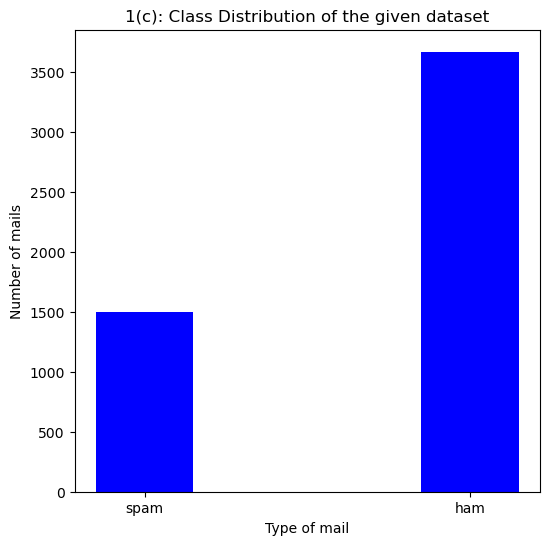

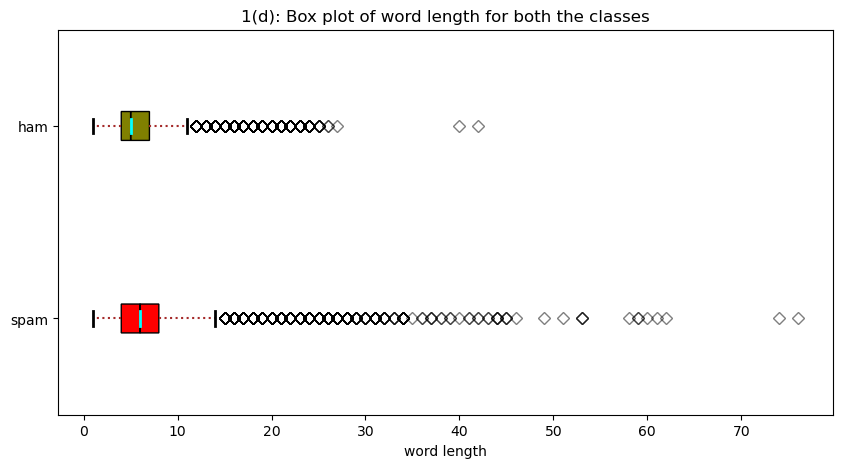

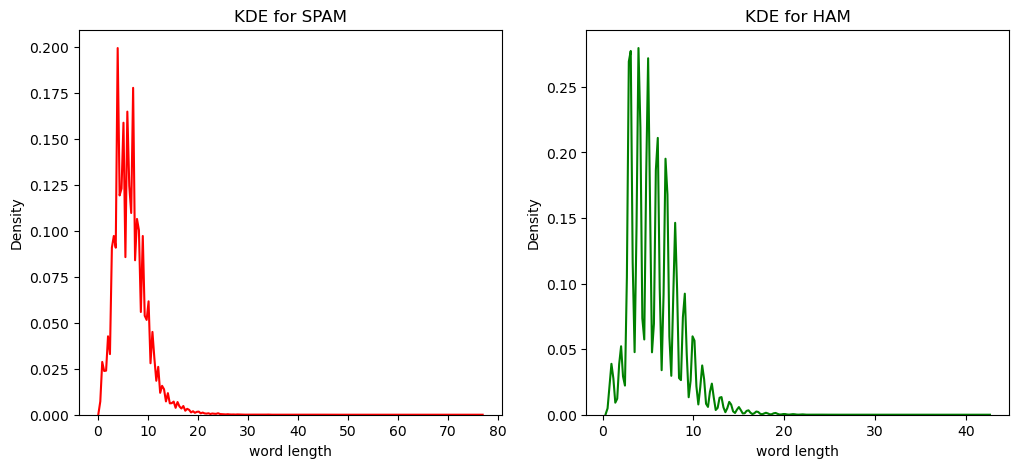

--------------------------------------------------




In [1]:
# %load ml_part1.py
# GROUP NUMBER : 27
# GROUP MEMBERS:
#	Akshay Ramesh Bhivagade	(22CL60R16)
#	Anubhav Dhar			(20CS30004)
#	Rahul Arvind Mool		(22CS60R72)
#
# EMAIL SPAM FILTER USING NAIVE BAYES CLASSIFIER LEARNING MODEL (SFNB)
#





import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Done
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def clean_text(text,boolean):
    # Lowercase the text
    text = text.lower()
    #Clean the text
    cleaned_text = re.sub("[\r\n]", "", text)
    # Tokenize the text
    tokens = word_tokenize(cleaned_text)
    if boolean == False:
        return tokens
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if ((token not in stop_words)  and (not token.isnumeric()))]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens



# problem 1 
def problem_1(): 
	data = pd.read_csv("email_spam_dataset.csv")

	is_spam = data['label_num'].tolist()		# This contains the label for spam
	mail_text = data['text'].tolist()			# This contains the text

	N = len(is_spam)

	word_freq_spam = {}							# will contain the most freqent words in spam
	word_freq_ham = {}							# will contain the most freqent words in ham

	spam_count = 0
	ham_count = 0

	word_lens_spam = []
	word_lens_ham = []

	print("\n\n--------------------------------------------------")
	print("\nPROBLEM 1")


	# problem 1(a)
	for i in range(0, N):

		# determine spam_count and ham_count
		if is_spam[i] == 1:
			spam_count += 1
		else:
			ham_count += 1

		# do the text cleanup
		word_list = clean_text(mail_text[i], True) 		# cleanup the text
		for word in word_list:							# extract words from text
			if word.isalpha():							# only consider words which are alphabetic
				if is_spam[i] == 1:
					word_lens_spam.append(len(word))
					if word in word_freq_spam:
						word_freq_spam[word] += 1
					else:
						word_freq_spam.update({word: 1})
				else:
					word_lens_ham.append(len(word))
					if word in word_freq_ham:
						word_freq_ham[word] += 1
					else:
						word_freq_ham.update({word: 1})


	# problem 1(b)
	ITERATIONS = 10;
	print("\n\nTop 10 words in SPAM are: ")
	for iteration in range(0, ITERATIONS): 				# finding top occuring word everytime
		mx = 0
		mx_str = ""
		for word in word_freq_spam:
			if mx < word_freq_spam[word]:
				mx = word_freq_spam[word]
				mx_str =  word
		print(str(iteration + 1) + ".\t" + mx_str, end = "")
		for i in range(0, 20 - len(mx_str)):
			print(" ", end = "")
		print("[Count : " + str(word_freq_spam[mx_str]) + "]")
		del word_freq_spam[mx_str]						# delete the top occuring word

	print("\n\nTop 10 words in HAM are: ")
	for iteration in range(0, ITERATIONS): 				# finding top occuring word everytime
		mx = 0
		mx_str = ""
		for word in word_freq_ham:
			if mx < word_freq_ham[word]:
				mx = word_freq_ham[word]
				mx_str =  word
		print(str(iteration + 1) + ".\t" + mx_str, end = "")
		for i in range(0, 20 - len(mx_str)):
			print(" ", end = "")
		print("[Count : " + str(word_freq_ham[mx_str]) + "]")
		del word_freq_ham[mx_str]						# delete the top occuring word
	print("");
	

	# problem 1(c)
	data = {'spam':spam_count, 'ham':ham_count}
	fig = plt.figure(figsize = (6, 6))
	plt.bar(data.keys(), data.values(), color = 'blue', width = 0.3)
	plt.xlabel("Type of mail")
	plt.ylabel("Number of mails")
	plt.title("1(c): Class Distribution of the given dataset")
	plt.show()


	# problem 1(d)

	# box plot:
	fig = plt.figure(figsize = (10, 5))
	axes = fig.add_subplot(111)

	box_plot = axes.boxplot([word_lens_spam, word_lens_ham], patch_artist = True, notch = 'True', vert = 0)

	colors = ['red', 'olive']
	for patch, color in zip(box_plot['boxes'], colors):
		patch.set_facecolor(color)

	for attr in box_plot['whiskers']:
		attr.set(color = 'brown', linewidth = 1.5, linestyle = ":")

	for attr in box_plot['caps']:
		attr.set(color = 'black', linewidth = 2)

	for attr in box_plot['medians']:
		attr.set(color = 'cyan', linewidth = 2)

	for attr in box_plot['fliers']:
		attr.set(marker = 'D', color = 'cyan', alpha = 0.5)

	axes.set_yticklabels(['spam', 'ham'])
	axes.get_xaxis().tick_bottom()
	axes.get_yaxis().tick_left()
	plt.xlabel("word length")
	plt.title("1(d): Box plot of word length for both the classes")
	plt.show()

	#kernel density estimation (KDE) plot
	fig = plt.figure(figsize = (12, 5))
	plt.subplot(1, 2, 1)
	sb.kdeplot(word_lens_spam, color = 'red', label = 'Spam')
	plt.xlabel("word length")
	plt.title("KDE for SPAM")
	plt.subplot(1, 2, 2)
	sb.kdeplot(word_lens_ham, color = 'green', label = 'Not Spam')
	plt.xlabel("word length")
	plt.title("KDE for HAM")
	plt.show()

	print("--------------------------------------------------\n\n")

problem_1()

In [ ]:
# GROUP NUMBER : 27
# GROUP MEMBERS:
#	Akshay Ramesh Bhivagade	(22CL60R16)
#	Anubhav Dhar			(20CS30004)
#	Rahul Arvind Mool		(22CS60R72)
#
# EMAIL SPAM FILTER USING NAIVE BAYES CLASSIFIER LEARNING MODEL (SFNB)
#

import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def clean_text(text,boolean):
    # Lowercase the text
    text = text.lower()
    #Clean the text
    cleaned_text = re.sub("[\r\n]", "", text)
    # Tokenize the text
    tokens = word_tokenize(cleaned_text)
    if boolean == False:
        return tokens
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if ((token not in stop_words)  and (not token.isnumeric()))]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# added randomization in split
def traintestsplit(spreadsheet,split):
    #this will randamize the spread sheet by frac of 1
    spreadsheet=spreadsheet.sample(frac = 1)
    spreadsheet.set_axis([x for x in range(spreadsheet.shape[0])],inplace=True)
    size=int(spreadsheet.shape[0]*split)
    train=spreadsheet.copy()
    test=spreadsheet.copy()
    train.drop([x for x in range(size,spreadsheet.shape[0])],axis=0,inplace=True)
    test.drop([x for x in range(0,size)],axis=0,inplace=True)
    # this line will rename the index of spreadsheet
    test.set_axis([x for x in range(test.shape[0])], inplace=True)
    return train,test
# attribute function returns the words which has the highest count
# in the dataset and the size tells how many words we want 
# dataset
def attribute(Dict,size):
    l=[]
    for x in range(size):
        l.append(max(zip(Dict.values(),Dict.keys()))[1])
        Dict.pop(max(zip(Dict.values(),Dict.keys()))[1])
    return l

# createdata returns a dictionary which will have a word and count of word 
# in the whole test dataset here y is the output in our case its spam and ham
# since we are create different dictionary for both of them
def createdata(data,y,boolean=True):
    garbagedata=[x for x in data.text]
    #garbagedata_flatten=sum(garbagedata,[])
    garbagedata=set(garbagedata)
    features=[clean_text(x,boolean) for x in garbagedata] #traintext==spreadsheet.text
    flatten_list = sum(features, [])
    features=set(flatten_list)
    features=[x for x in features if len(x)>2]
    features=[x for x in features if wordnet.synsets(x)]
    output=data.copy()
    for x in range(output.text.shape[0]):
        if not output.label[x]==y:
            output.drop(x,axis=0,inplace=True)        
    CDictout={}
    for x in features:
        CDictout[x]=0
    for x in features:
        for p in output.text:
            check=" "+x+" "
            if check in p:
                #print(x,CDictspam,clean_text(p))
                CDictout[x]=CDictout[x]+1  
    return CDictout
# createfeatures takes top appearing words from spam and ham and merge
# them into a unique set
def createfeatures(train,size,boolean=True):
    l1=attribute(createdata(train,'spam',boolean),size)
    l2=attribute(createdata(train,'ham',boolean),size)
    l1.extend(l2)
    l1=set(l1)
    features=list(l1)
    return features
# nparray is used to create a table with features as words and 
# the rows will tell what is the number of time that word appeard
# in the particular feature (i.e word)
def nparray(spreadsheet,features):
    x_test=[]
    y_test=[]
    for x in range(spreadsheet.shape[0]):
        l=[0 for p in features]
        for p in range(len(features)):
            if features[p] in spreadsheet.text[x]:
                l[p]=l[p]+1
        x_test.append(l)
    for x in range(spreadsheet.shape[0]):
        y_test.append(spreadsheet.label_num[x])
    return x_test,y_test
# naive baysein  original
def fit2(x_train,y_train):
    result={}
    result["total_data"]=len(y_train)
    for current_class in (set(y_train)):
        result[current_class]={}
        result[current_class]["total_count"]=(y_train==current_class).sum()
        for j in range(1,x_train.shape[1]+1):
            currentclass=(y_train==current_class)
            currentXtrain=x_train[currentclass]
            allpossiblevaluesofX=set(x_train[:,j-1])
            result[current_class][j]={}
            for current_value in allpossiblevaluesofX:
                result[current_class][j][current_value]=(currentXtrain[:,j-1]==current_value).sum()
    return result
def prob(dict,x,currentclass,laplace):
    totalycount=dict[currentclass]['total_count']
    # here the output currently is the probability
    # of currentclass i.e y
    output=totalycount/dict['total_data']
    # -1 is because total_count is extra
    numoffeatures=len(dict[currentclass])-1
    for features in range(1,numoffeatures+1):
        xj=x[features-1]
        currentprob=(dict[currentclass][features][xj]+laplace)/(dict[currentclass]['total_count']+laplace*len(dict[currentclass][features].keys()))
        output=output*currentprob
    return output
def predictsinglerow(dict,x,laplace):
    # -1 is for total_data
    maxprob=-100
    outputclass=-1
    possibleoutput=len(dict)-1
    first=True
    for currentclass in range(possibleoutput):
        probability=prob(dict,x,currentclass,laplace)
        if(first or maxprob<probability):
            maxprob=probability
            outputclass=currentclass
            first=False
    return outputclass
def predictions(dict,x,laplace):
    out=[]
    for p in range(x.shape[0]):
        predoutput=predictsinglerow(dict,x[p,:],laplace)
        out.append(predoutput)
    return out  
#from classsification matrix finding classification report
def Returnaccuracy(true,pred):
    mat=pd.crosstab(true,pred)
    mat2=mat.to_numpy()
    mat=[[0,0],[0,0]]
    mat=mat+mat2
    accuracy=float(mat[0][0]+mat[1][1])/float(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
    return accuracy
def precision(true,pred):
    mat=pd.crosstab(true,pred)
    mat2=mat.to_numpy()
    mat=[[0,0],[0,0]]
    mat=mat+mat2
    precision1=float(mat[0][0])/float(mat[0][0]+mat[0][1])
    precision2=float(mat[1][1])/float(mat[1][0]+mat[1][1])
    return precision1, precision2
def recall(true,pred):
    mat=pd.crosstab(true,pred)
    mat2=mat.to_numpy()
    mat=[[0,0],[0,0]]
    mat=mat+mat2
    recall1=float(mat[0][0])/float(mat[0][0]+mat[1][0])
    recall2=float(mat[1][1])/float(mat[0][1]+mat[1][1])
    return recall1,recall2
def support(true,pred):
    mat=pd.crosstab(true,pred)
    mat2=mat.to_numpy()
    mat=[[0,0],[0,0]]
    mat=mat+mat2
    su1=float(mat[0][0]+mat[0][1])/float(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
    su2=float(mat[1][0]+mat[1][1])/float(mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
    return su1,su2
def f1score(true,pred):
    p1,p2=precision(true,pred)
    r1,r2=recall(true,pred)
    f1,f2=2*p1*r1/(p1+r1),2*p2*r2/(p2+r2)
    return f1,f2
def accuracyontenrandomsplit(spreadsheet,count,laplace=0):
    summition=0
    maximum=0
    for x in range(1,11):
        #print(x)
        newspreadsheet=spreadsheet.copy()
        train,test=traintestsplit(newspreadsheet,0.8)
        features=createfeatures(train,count)
        x_train,y_train=nparray(train,features)
        x_test,y_test=nparray(test,features)
        X_test,Y_test,X_train,Y_train=np.array(x_test),np.array(y_test),np.array(x_train),np.array(y_train)
        Y_pred = predictions(fit2(X_train,Y_train),X_test,laplace)
        summition=summition+Returnaccuracy(Y_test,Y_pred)
        if(maximum<Returnaccuracy(Y_test,Y_pred)):
            maximum=Returnaccuracy(Y_test,Y_pred)
    summition=summition/10
    return maximum,summition
# 2.a here there is not laplace correction
spreadsheet2 = pd.read_csv('email_spam_dataset.csv')
#spreadsheet2=spreadsheet2[:50]
max2,avg2=accuracyontenrandomsplit(spreadsheet2,425) #here 425 is the number of features which our model has
print("Without laplace correction average of 10 different data set is ",avg2)
print("Without laplace correction maximum accuracy of 10 different data set is ",max2)
# 2.b  it is being trained on laplace correction
spreadsheet2 = pd.read_csv('email_spam_dataset.csv')
#spreadsheet2=spreadsheet2[:50]
train,test=traintestsplit(spreadsheet2,0.8)
features=createfeatures(train,425)
x_train,y_train=nparray(train,features)
x_test,y_test=nparray(test,features)
X_test,Y_test1,X_train,Y_train=np.array(x_test),np.array(y_test),np.array(x_train),np.array(y_train)
Y_pred1 = predictions(fit2(X_train,Y_train),X_test,1)
print("With laplace correction and cleaning",Returnaccuracy(Y_test1,Y_pred1))
Y_pred2 = predictions(fit2(X_train,Y_train),X_test,0)
#print("With laplace correction and cleaning",Returnaccuracy(Y_test,Y_pred2))
# 2.c 
#features=createfeatures(train,20,False)
features=createfeatures(train,425,False)
x_train,y_train=nparray(train,features)
x_test,y_test=nparray(test,features)
X_test,Y_test2,X_train,Y_train=np.array(x_test),np.array(y_test),np.array(x_train),np.array(y_train)
Y_pred3 = predictions(fit2(X_train,Y_train),X_test,1)
print("With laplace correction and no clearning: ",Returnaccuracy(Y_test2,Y_pred3))
# 2.c
Y_pred4 = predictions(fit2(X_train,Y_train),X_test,0)
print("Without laplace correction and no cleaning: ",Returnaccuracy(Y_test2,Y_pred4))
#3.a and 3.b
p1,p2=precision(Y_test1,Y_pred2)
r1,r2=recall(Y_test1,Y_pred2)
f1,f2=f1score(Y_test1,Y_pred2)
s1,s2=support(Y_test1,Y_pred2)
a1=Returnaccuracy(Y_test1,Y_pred2)
print("Classification Report for text cleaning without laplace correction")
print("         precession     recall   f1score    support")
print("for 0:-      ",round(p1,3),"   ",round(r1,3),"   ",round(f1,3),"   ",round(s1,3))
print("for 1:-      ",round(p2,3),"   ",round(r2,3),"   ",round(f2,3),"   ",round(s2,3))
print("accuracy is ", a1)
p1,p2=precision(Y_test1,Y_pred1)
r1,r2=recall(Y_test1,Y_pred1)
f1,f2=f1score(Y_test1,Y_pred1)
a1=Returnaccuracy(Y_test1,Y_pred1)
s1,s2=support(Y_test1,Y_pred1)
print()
print("Classification Report for text cleaning with laplace correction")
print("         precession     recall   f1score    support")
print("for 0:-      ",round(p1,3),"   ",round(r1,3),"   ",round(f1,3),"   ",round(s1,3))
print("for 1:-      ",round(p2,3),"   ",round(r2,3),"   ",round(f2,3),"   ",round(s2,3))
print("accuracy is ", a1)
p1,p2=precision(Y_test2,Y_pred4)
r1,r2=recall(Y_test2,Y_pred4)
f1,f2=f1score(Y_test2,Y_pred4)
s1,s2=support(Y_test2,Y_pred4)
a1=Returnaccuracy(Y_test2,Y_pred4)
print()
print("Classification Report for non text cleaning without laplace correction")
print("         precession     recall   f1score    support")
print("for 0:-      ",round(p1,3),"   ",round(r1,3),"   ",round(f1,3),"   ",round(s1,3))
print("for 1:-      ",round(p2,3),"   ",round(r2,3),"   ",round(f2,3),"   ",round(s2,3))
print("accuracy is ", a1)
p1,p2=precision(Y_test2,Y_pred3)
r1,r2=recall(Y_test2,Y_pred3)
f1,f2=f1score(Y_test2,Y_pred3)
s1,s2=support(Y_test2,Y_pred3)
a1=Returnaccuracy(Y_test2,Y_pred3)
print()
print("Classification Report for non text cleaning with laplace correction")
print("         precession     recall   f1score    support")
print("for 0:-      ",round(p1,3),"   ",round(r1,3),"   ",round(f1,3),"   ",round(s1,3))
print("for 1:-      ",round(p2,3),"   ",round(r2,3),"   ",round(f2,3),"   ",round(s2,3))
print("accuracy is ", a1)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\samsung\AppData\Local\Temp\ipykernel_14268\2864412624.py:42: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  spreadsheet.set_axis([x for x in range(spreadsheet.shape[0])],inplace=True)
C:\Users\samsung\AppData\Local\Temp\ipykernel_14268\2864412624.